In [731]:
#This is the importation cell

import numpy as np
import matplotlib.pyplot as plt
import time

## Here are all of the functional cells

In [732]:
#This is the K-means cell

max_iter = 100

def K_means(K , points):

    num_points = points.shape[0]

    centroids = np.arange(num_points)

    centroids = np.random.choice(centroids , (K) , replace = False)

    centroids = points[centroids,:].copy()

    dists = np.zeros((num_points,K))

    for i in range(max_iter):
        
        for k in range(K):
    
            dists[:,k] = np.linalg.norm((points - centroids[k,:]) , axis = 1)
    
        closest_to = np.argmin(dists , axis = 1)

        past_centroids = centroids.copy()

        for k in range(K):

            points_in_k = points[closest_to == k , :].copy()

            centroids[k,:] = np.mean(points_in_k,axis = 0)

        if(np.linalg.norm(centroids - past_centroids) / np.linalg.norm(past_centroids) < .002):

            break

    clustered = []

    for k in range(K):

        points_in_k = points[closest_to == k , :].copy()

        clustered.append(points_in_k)

    return clustered

In [733]:
#This is the K-means++ cell

max_iter = 100

def K_means_pp(K , points):

    num_points = points.shape[0]

    whole_range = np.arange(num_points)

    centroids = np.random.choice(whole_range , (K) , replace = False)

    centroids = points[centroids,:].copy()

    for k in range(1,K):

        dists = np.zeros((num_points,k))

        for l in range(k):
    
            dists[:,l] = np.linalg.norm((points - centroids[l,:]) , axis = 1)

        dists = np.min(dists , axis = 1)

        probability = dists**2 / np.sum(dists**2)

        new_centroid = np.random.choice(whole_range , (1) , replace = False , p = probability)

        new_centroid = points[new_centroid,:].copy()

        centroids[k,:] = new_centroid

    dists = np.zeros((num_points,K))

    for i in range(max_iter):
        
        for k in range(K):
    
            dists[:,k] = np.linalg.norm((points - centroids[k,:]) , axis = 1)
    
        closest_to = np.argmin(dists , axis = 1)

        past_centroids = centroids.copy()

        for k in range(K):

            points_in_k = points[closest_to == k , :].copy()

            centroids[k,:] = np.mean(points_in_k,axis = 0)

        if(np.linalg.norm(centroids - past_centroids) / np.linalg.norm(past_centroids) < .002):

            break

    clustered = []

    for k in range(K):

        points_in_k = points[closest_to == k , :].copy()

        clustered.append(points_in_k)

    return clustered

In [734]:
#This is the Gaussian Mixture Modelling cell

max_iter = 100

def probability(x , mu_k , cov_k , num_dims):

    

    coef = 1/( np.sqrt( np.power(2*np.pi , num_dims) * np.linalg.norm(cov_k) ) )
    try:
        expTerm = np.exp( (-.5) * np.matmul(np.expand_dims((x - mu_k),1).T , np.matmul( np.linalg.inv(cov_k) , np.expand_dims((x - mu_k),1)) ) )
    except:
        expTerm = 0

    return expTerm*coef

def GMM(K , points):

    num_points = points.shape[0]

    num_dims = points.shape[1]

    cov = np.zeros((num_dims,num_dims,K))

    for k in range(K):

        cov_k = np.random.rand(num_dims,num_dims)

        cov_k = cov_k*cov_k.T * .05
        
        cov[:,:,k] = cov_k

    mu = np.random.rand(num_dims,K)

    pis = np.random.rand(K)

    pis = pis/np.sum(pis)

    prob_in = np.zeros((num_points,K))

    for iter in range(max_iter):
        for i in range(num_points):
    
            for j in range(K):
    
                gamma_j = pis[j]*probability(np.squeeze(points[i,:]) , mu[:,j] , cov[:,:,j] , num_dims)
    
                prob_in[i,j] = gamma_j
    
            prob_in[i,:] = prob_in[i,:] / np.sum(prob_in[i,:])

        past_cov = cov.copy()
        past_mu = mu.copy()
        
        for k in range(K):

            pis[k] = (1/num_points) * np.sum(prob_in[:,k])

            mu[:,k] = np.sum(np.expand_dims(prob_in[:,k],1) * points , axis = 0) / np.sum(prob_in[:,k])

            cov_k = np.zeros((num_dims,num_dims))
            
            for i in range(num_points):
                
                cov_k = cov_k + prob_in[i,k]* np.matmul(np.expand_dims((np.squeeze(points[i,:]) - past_mu[:,k]),1) , np.expand_dims((np.squeeze(points[i,:]) - past_mu[:,k]),1).T)

            cov[:,:,k] = cov_k / np.sum(prob_in[:,k])

        if(np.linalg.norm(cov - past_cov) / np.linalg.norm(past_cov) < .002):
            break

    return cov , mu , pis
        

    

In [735]:
#This is the data generation cell

def generateData(num_clusters , points_per_cluster , num_dims , std):

    points = np.zeros((num_clusters*points_per_cluster , num_dims))

    for i in range(num_clusters):

        mean = np.random.rand(num_dims)

        cov = np.full((num_dims) , std*np.random.rand(1))

        cov = np.diag(cov)

        points[i*points_per_cluster:(i+1)*points_per_cluster] = np.random.multivariate_normal(mean,cov,points_per_cluster)

    np.random.shuffle(points)
    
    return points

# points = generateData(5, 50 , 3,.001)


### Question 1

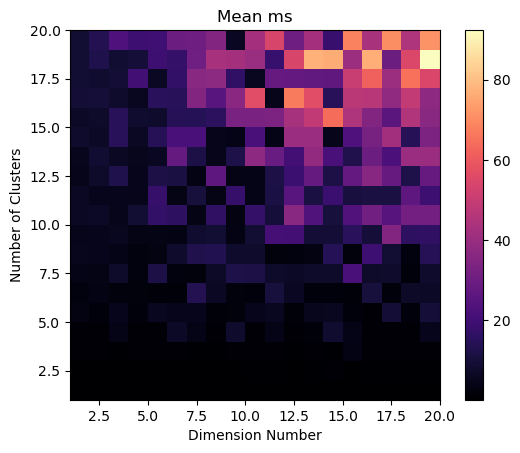

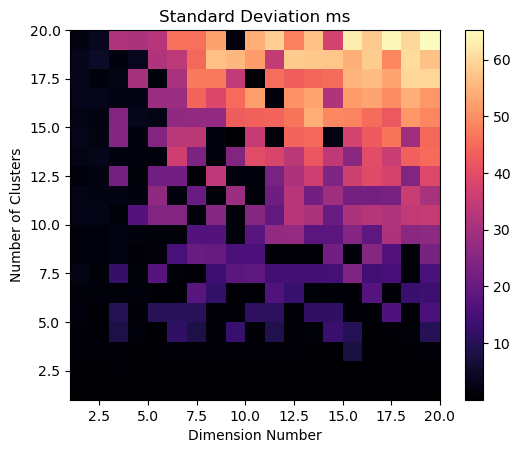

In [736]:
#This cell does question 1

dt_tensor = np.zeros((19,19,10))

for k in range(1 , 20):
    for d in range(1 , 20):
        for i in range(10):
    
            points = generateData(k, int(500/k) , d,.005)
            
            t1 = time.time()
            
            clustered = K_means(k , points.copy())

            t2 = time.time()

            dt_tensor[k-1,d-1,i] = (t2-t1)*1000

dt_mean = np.mean(dt_tensor , axis = 2)

dt_std = np.std(dt_tensor - np.expand_dims(dt_mean,2) , axis = 2)

plt.imshow(dt_mean,cmap = "magma" , origin = "lower" , extent = (1,20,1,20))
plt.colorbar()
plt.xticks()
plt.title("Mean ms")
plt.xlabel("Dimension Number")
plt.ylabel("Number of Clusters")
plt.show()

plt.imshow(dt_std,cmap = "magma" , origin = "lower" , extent = (1,20,1,20))
plt.colorbar()
plt.title("Standard Deviation ms")
plt.xlabel("Dimension Number")
plt.ylabel("Number of Clusters")
plt.show()

#As seen below, the general trend is the more clusters and the more dimensions, the more time it takes.
#The calculation also becomes more volitile within the region of high times, seen within the standard deviation.

### Question 2

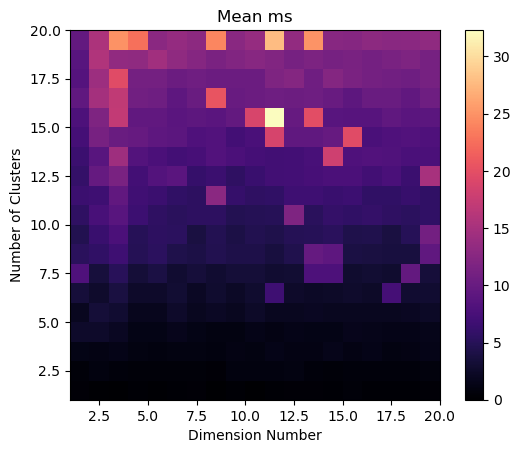

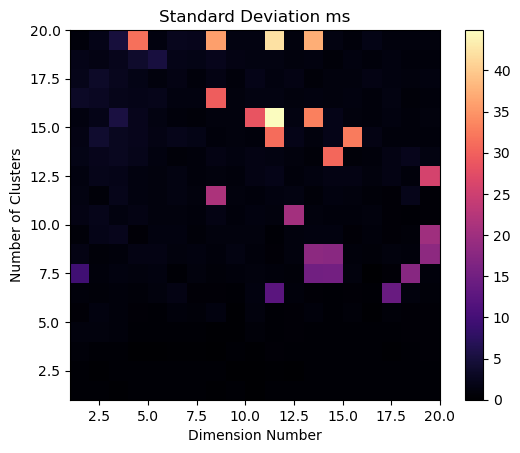

In [737]:
#This cell does question 2

dt_tensor = np.zeros((19,19,10))

for k in range(1 , 20):
    for d in range(1 , 20):
        for i in range(10):
    
            points = generateData(k, int(500/k) , d,.005)
            
            t1 = time.time()
            
            clustered = K_means_pp(k , points.copy())

            t2 = time.time()

            dt_tensor[k-1,d-1,i] = (t2-t1)*1000

dt_mean = np.mean(dt_tensor , axis = 2)

dt_std = np.std(dt_tensor - np.expand_dims(dt_mean,2) , axis = 2)

plt.imshow(dt_mean,cmap = "magma" , origin = "lower" , extent = (1,20,1,20))
plt.colorbar()
plt.xticks()
plt.title("Mean ms")
plt.xlabel("Dimension Number")
plt.ylabel("Number of Clusters")
plt.show()

plt.imshow(dt_std,cmap = "magma" , origin = "lower" , extent = (1,20,1,20))
plt.colorbar()
plt.title("Standard Deviation ms")
plt.xlabel("Dimension Number")
plt.ylabel("Number of Clusters")
plt.show()

#K means ++ appears to have amuch better trends with its mean time. Interestingly, it only seems to vary significantly with the number
#of clusters, unlike K means which had a heavy reliance on dimension. Very interesting. Disregarding the erronious high times, the 
#maximum time appears to be around 15 ms as opposed to K means' 100 ms or so. The standard deviation is also much more palatable.

### Question 3

In [738]:
#This cell does question 3

dt_tensor = np.zeros((5,5,10))

for k in range(2 , 7):
    for d in range(2 , 7):
        for i in range(10):
    
            points = generateData(k, int(500/k) , d,.005)
            
            t1 = time.time()
            
            _,_,_ = GMM(k , points.copy())

            t2 = time.time()

            dt_tensor[k-2,d-2,i] = (t2-t1)*1000

dt_mean = np.mean(dt_tensor , axis = 2)

dt_std = np.std(dt_tensor - np.expand_dims(dt_mean,2) , axis = 2)

C:\Users\ashle\AppData\Local\Temp\ipykernel_5692\1433193551.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob_in[i,j] = gamma_j
C:\Users\ashle\AppData\Local\Temp\ipykernel_5692\1433193551.py:11: RuntimeWarning: overflow encountered in exp
  expTerm = np.exp( (-.5) * np.matmul(np.expand_dims((x - mu_k),1).T , np.matmul( np.linalg.inv(cov_k) , np.expand_dims((x - mu_k),1)) ) )
C:\Users\ashle\AppData\Local\Temp\ipykernel_5692\1433193551.py:50: RuntimeWarning: invalid value encountered in divide
  prob_in[i,:] = prob_in[i,:] / np.sum(prob_in[i,:])
C:\Users\ashle\AppData\Local\Temp\ipykernel_5692\1433193551.py:59: RuntimeWarning: invalid value encountered in divide
  mu[:,k] = np.sum(np.expand_dims(prob_in[:,k],1) * points , axis = 0) / np.sum(prob_in[:,k])
C:\Users\ashle\AppData\Local\Temp\ipykernel_5692\143

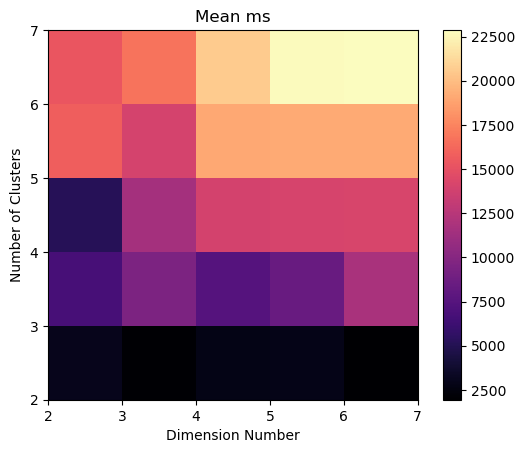

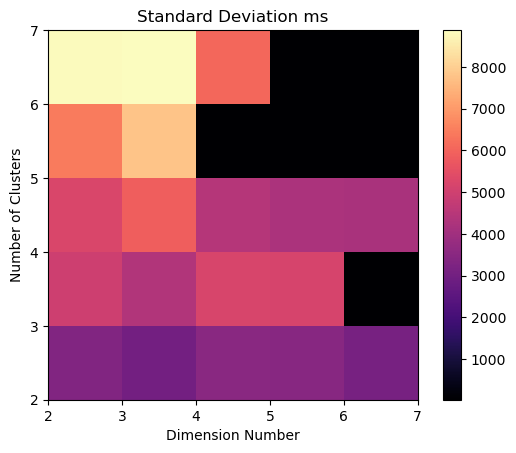

In [741]:
#This cell plots the results of question 3
plt.imshow(dt_mean,cmap = "magma" , origin = "lower" , extent = (2,7,2,7))
plt.colorbar()
plt.xticks()
plt.title("Mean ms")
plt.xlabel("Dimension Number")
plt.ylabel("Number of Clusters")
plt.show()

plt.imshow(dt_std,cmap = "magma" , origin = "lower" , extent = (2,7,2,7))
plt.colorbar()
plt.title("Standard Deviation ms")
plt.xlabel("Dimension Number")
plt.ylabel("Number of Clusters")
plt.show()

#I had to seriously lower the amount of tests run here because this method is so slow. I dont know if I made a mistake or if it is supposed
#to be this slow. It seems to cluster the data fine though. Other than that, not too much to say.

### Proof that it works

C:\Users\ashle\AppData\Local\Temp\ipykernel_5692\2492641603.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(clustered[i][:,0] , clustered[i][:,1] , c = np.random.rand(3))


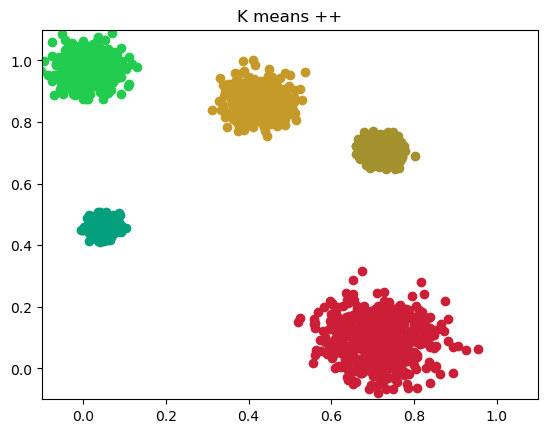

In [742]:
#This cell just shows K means ++ working, the results from the other two are basically identical

points = generateData(5, 500 , 2,.005)

clustered = K_means_pp(5 , points.copy())

for i in range(5):
    plt.scatter(clustered[i][:,0] , clustered[i][:,1] , c = np.random.rand(3))

plt.xlim([-.1 , 1.1])
plt.ylim([-.1 , 1.1])
plt.title("K means ++")
plt.show()